In [ ]:
# @title Tahap 1: Mendeskripsikan Data
import pandas as pd
data=pd.read_csv('/content/sample_data/Data_Harga_rumah_surabaya.csv',delimiter=';')
# Jumlah data (baris dan kolom)

print("Jumlah data (baris, kolom):", data.shape)

# Informasi tentang tipe data dan skema pengkodean
print("\nInformasi tipe data dan skema pengkodean:")
print(data.info())


Jumlah data (baris, kolom): (8980, 18)

Informasi tipe data dan skema pengkodean:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8980 entries, 0 to 8979
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Kecamatan            8980 non-null   object 
 1    Price               8980 non-null   object 
 2   Kamar Tidur          8980 non-null   int64  
 3   Kamar Mandi          8980 non-null   int64  
 4   Luas Tanah           8980 non-null   int64  
 5   Luas Bangunan        8980 non-null   int64  
 6   Sertifikat           8980 non-null   object 
 7   Daya Listrik         6815 non-null   float64
 8   Ruang Makan          6618 non-null   object 
 9   Ruang Tamu           8414 non-null   object 
 10  Kondisi Perabotan    8980 non-null   object 
 11  Jumlah Lantai        8941 non-null   float64
 12  Hadap                5851 non-null   object 
 13  Terjangkau Internet  8416 non-null   object 
 14  Lebar 

In [ ]:
# Statistik deskriptif untuk data numerik
print("\nStatistik deskriptif untuk data numerik:")
print(data.describe())

# Melihat beberapa baris pertama data
print("\nBeberapa baris pertama data:")
print(data.head())

# Menampilkan jumlah nilai unik untuk setiap kolom (untuk memahami kategori)
print("\nJumlah nilai unik untuk setiap kolom:")
for column in data.columns:
    print(f"{column}: {data[column].nunique()}")


Statistik deskriptif untuk data numerik:
       Kamar Tidur  Kamar Mandi   Luas Tanah  Luas Bangunan  Daya Listrik  \
count  8980.000000  8980.000000  8980.000000    8980.000000   6815.000000   
mean      3.546214     2.674610   187.124165     205.688085   2981.276596   
std       1.075697     1.049781   140.574192     157.436695   1749.447936   
min       1.000000     1.000000    45.000000      50.000000    900.000000   
25%       3.000000     2.000000    97.000000     110.000000   2200.000000   
50%       3.000000     3.000000   135.000000     160.000000   2200.000000   
75%       4.000000     3.000000   230.000000     250.000000   3500.000000   
max       7.000000     8.000000  1000.000000    3300.000000  17600.000000   

       Jumlah Lantai  
count    8941.000000  
mean        1.634716  
std         0.540629  
min         1.000000  
25%         1.000000  
50%         2.000000  
75%         2.000000  
max         4.000000  

Beberapa baris pertama data:
   Kecamatan         Price 

In [ ]:
data['Ruang Makan'] = data['Ruang Makan'].map({'Ya': 1, 'Tidak': 0})
data['Ruang Tamu'] = data['Ruang Tamu'].map({'Ya': 1, 'Tidak': 0})
data['Hadap'] = data['Hadap'].map({'Utara': 1, 'Timur': 2, 'Selatan': 3, 'Barat': 4})
data['Sertifikat'] = data['Sertifikat'].map({'SHM - Sertifikat Hak Milik': 1, 'HGB - Hak Guna Bangunan': 2, 'Lainnya (PBJB,Girik,Adat,dll)': 3})
data['Lebar Jalan'] = data['Lebar Jalan'].map({'1 Mobil': 1, '2 Mobil': 2, '3 Mobil': 3, '4 Mobil': 4})
data['Kondisi Properti'] = data['Sertifikat'].map({'Baru': 1, 'Bagus': 2, 'Sudah Renovasi': 3})

# Menampilkan beberapa baris pertama data setelah pengkodean
display(data.head())

,Kecamatan,Price,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik,Ruang Makan,Ruang Tamu,...,Sumber Air_Sumur Resapan,Hook_Tidak,Hook_Ya,Kondisi Properti_Bagus,Kondisi Properti_Bagus Sekali,Kondisi Properti_Baru,Kondisi Properti_Butuh Renovasi,Kondisi Properti_Sudah Renovasi,Kondisi Properti_Unfurnished,Kondisi Properti
0,wonokromo,600.000.000,3,2,45,70,NaN,1300.0,NaN,NaN,...,False,True,False,False,False,True,False,False,False,NaN
1,rungkut,600.000.000,3,2,48,2023,NaN,1300.0,NaN,NaN,...,False,True,False,False,False,True,False,False,False,NaN
2,semampir,600.000.000,3,3,48,85,NaN,1300.0,NaN,NaN,...,False,True,False,True,False,False,False,False,False,NaN
3,pakal,600.000.000,2,1,50,91,NaN,1300.0,NaN,NaN,...,False,False,True,False,False,True,False,False,False,NaN
4,gayungan,600.000.000,2,2,51,50,NaN,2200.0,NaN,NaN,...,False,True,False,False,False,True,False,False,False,NaN


Tahap 2: Eksplorasi data

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data
data = pd.read_csv('/content/sample_data/Data_Harga_rumah_surabaya.csv',delimiter=';')

# 1. Lima baris pertama
print("\nLima Baris Pertama Data:")
print(data.head())

# 2. Info data
print("\nInformasi Data:")
print(data.info())

# 3. Statistik deskriptif
print("\nStatistik Deskriptif:")
print(data.describe())

# 4. Nilai unik tiap kolom
print("\nJumlah Nilai Unik Setiap Kolom:")
for column in data.columns:
    print(f"{column}: {data[column].nunique()}")




Lima Baris Pertama Data:
   Kecamatan         Price   Kamar Tidur  Kamar Mandi  Luas Tanah  \
0  wonokromo   600.000.000             3            2          45   
1    rungkut   600.000.000             3            2          48   
2   semampir   600.000.000             3            3          48   
3      pakal   600.000.000             2            1          50   
4   gayungan   600.000.000             2            2          51   

   Luas Bangunan                  Sertifikat  Daya Listrik Ruang Makan  \
0             70  SHM - Sertifikat Hak Milik        1300.0       Tidak   
1           2023  SHM - Sertifikat Hak Milik        1300.0          Ya   
2             85  SHM - Sertifikat Hak Milik        1300.0          Ya   
3             91     HGB - Hak Guna Bangunan        1300.0          Ya   
4             50  SHM - Sertifikat Hak Milik        2200.0       Tidak   

  Ruang Tamu Kondisi Perabotan  Jumlah Lantai    Hadap Terjangkau Internet  \
0      Tidak       Unfurnished      

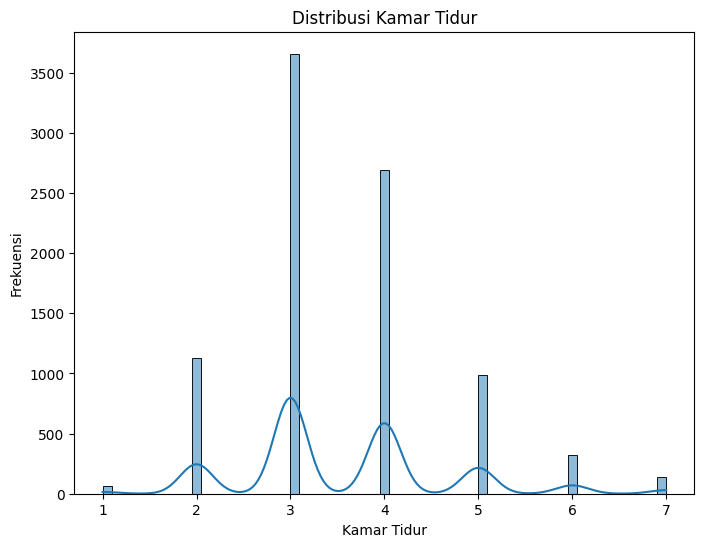

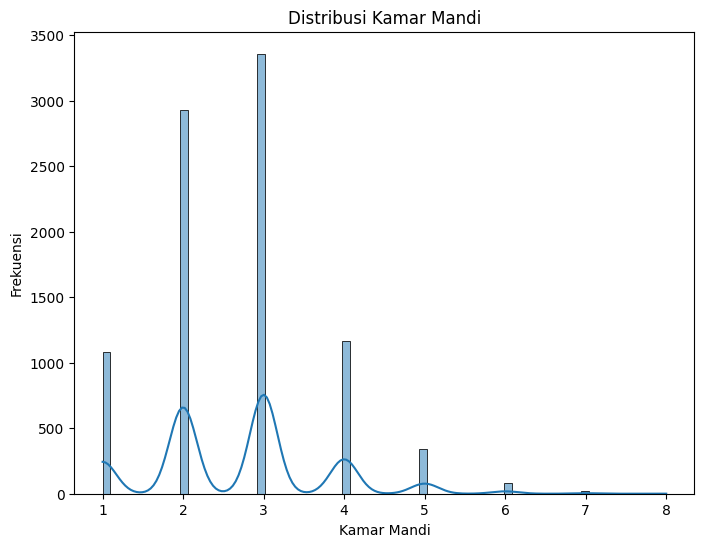

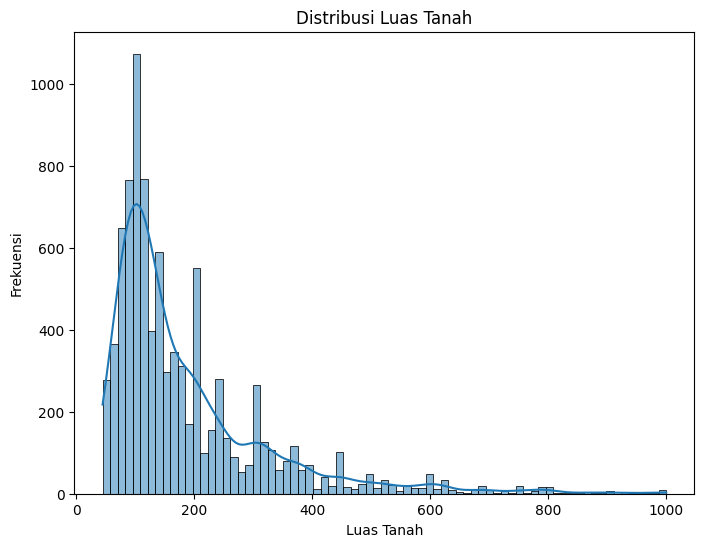

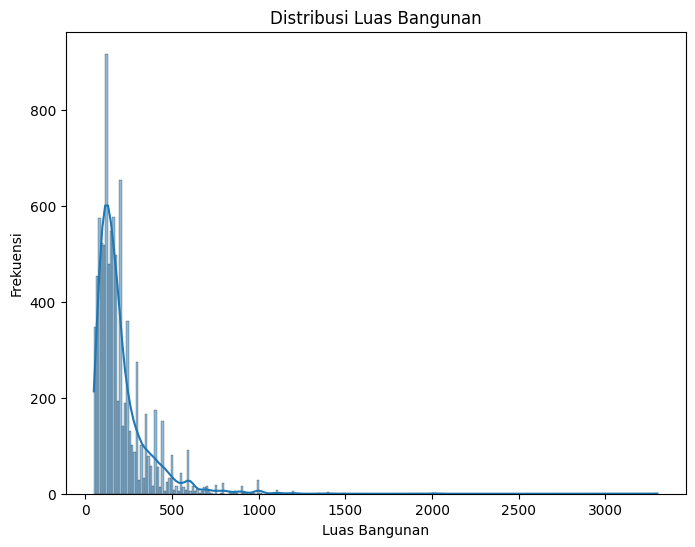

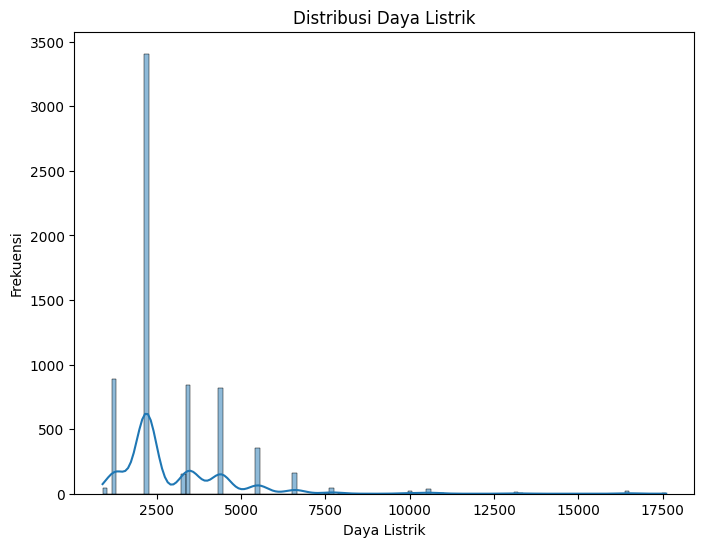

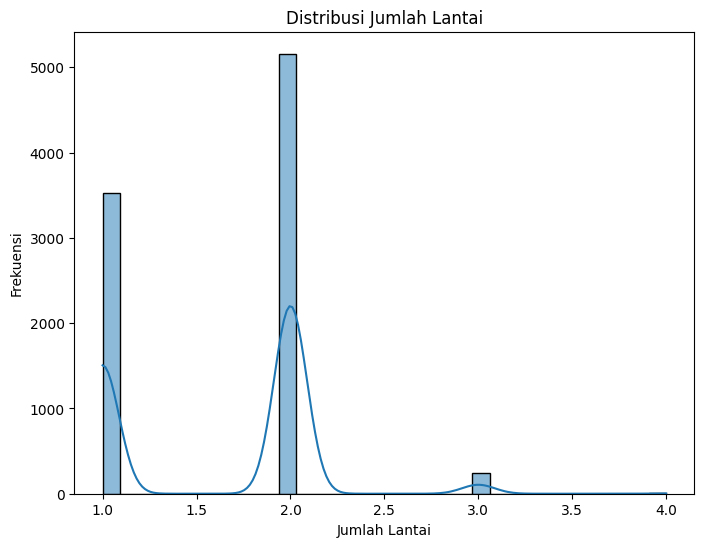

In [11]:
# 5. Distribusi fitur numerik
numerical_features = data.select_dtypes(include=['number']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f"Distribusi {feature}")
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')
    plt.show()

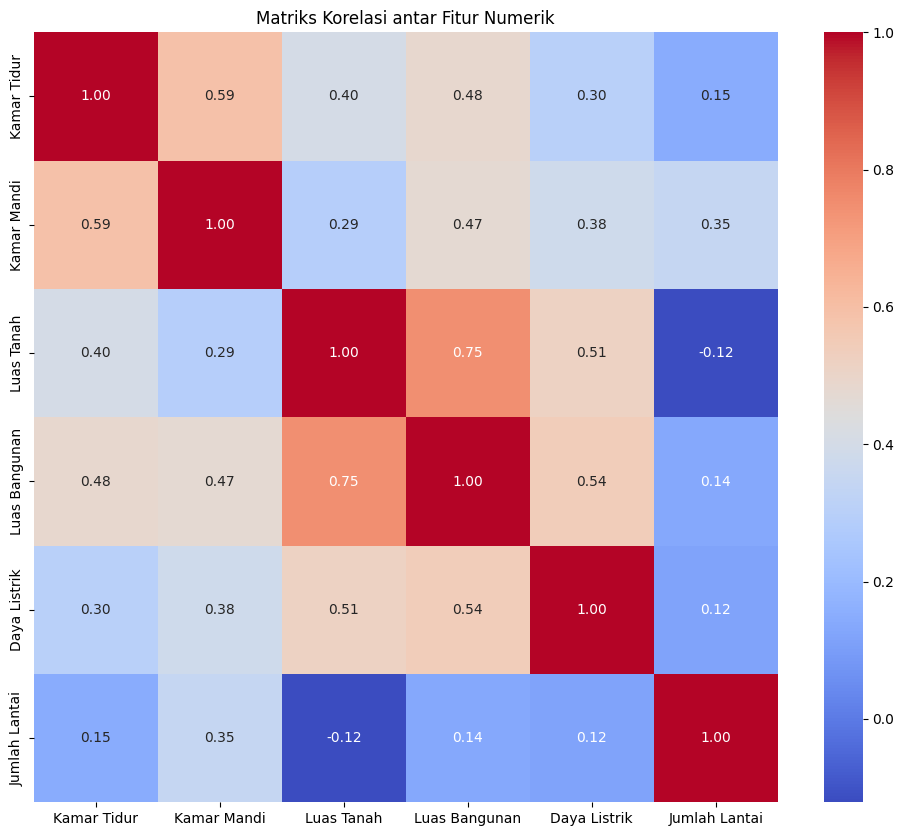

In [12]:
# 6. Korelasi antar variabel numerik
correlation_matrix = data[numerical_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi antar Fitur Numerik")
plt.show()

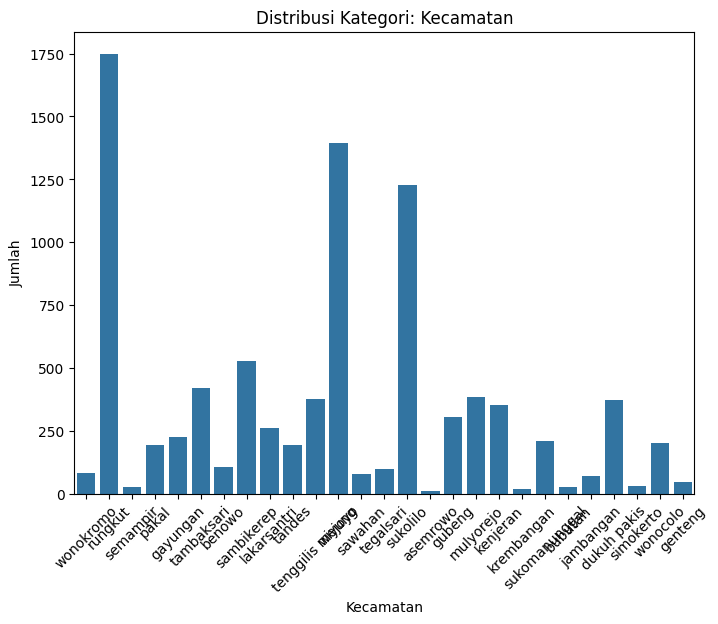

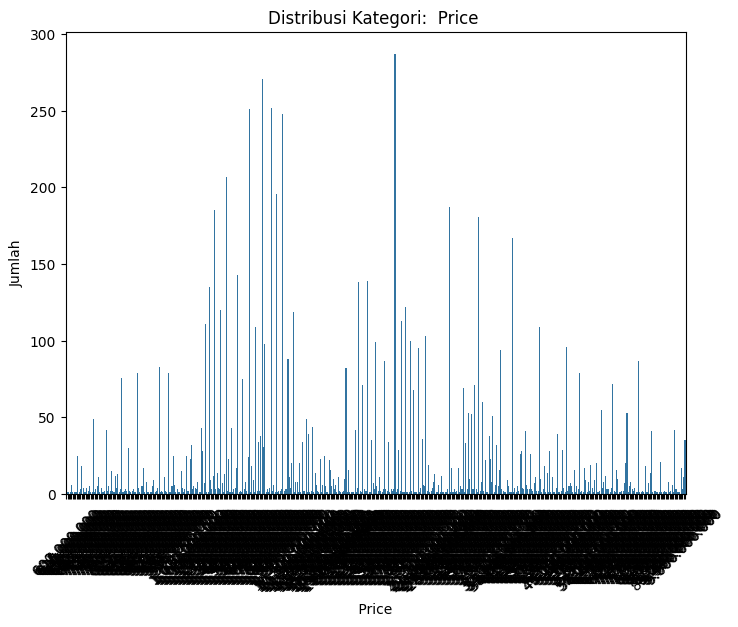

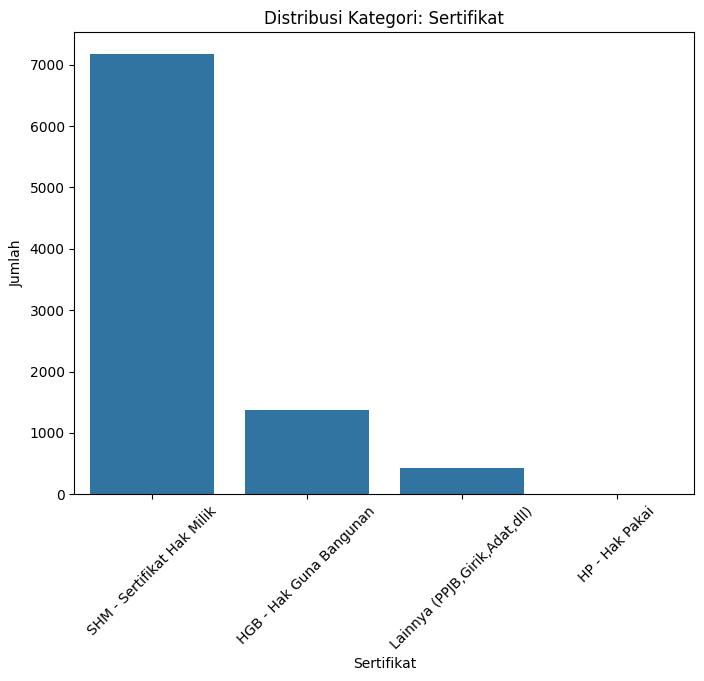

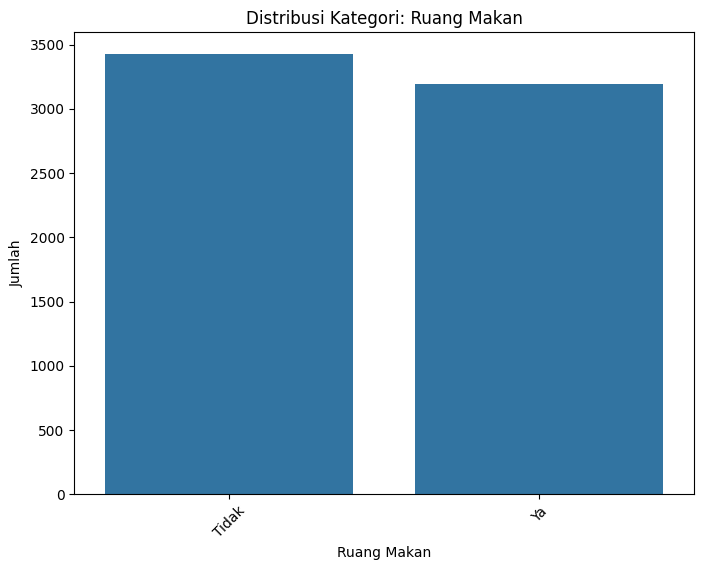

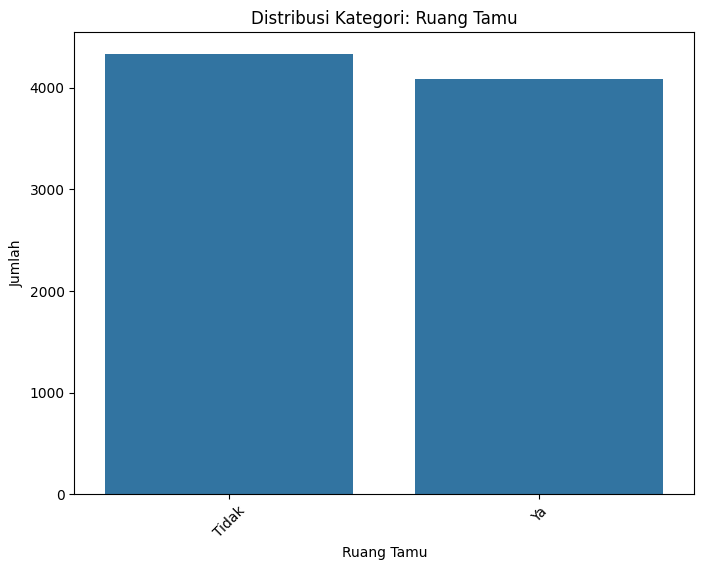

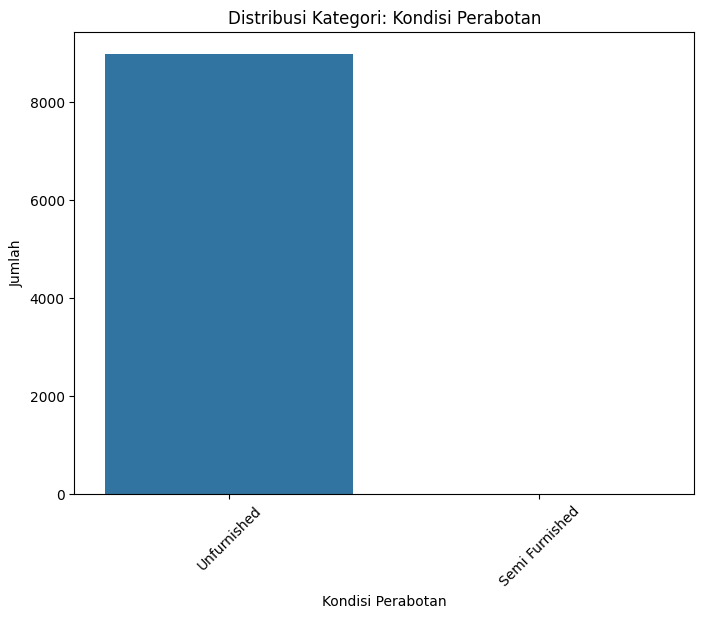

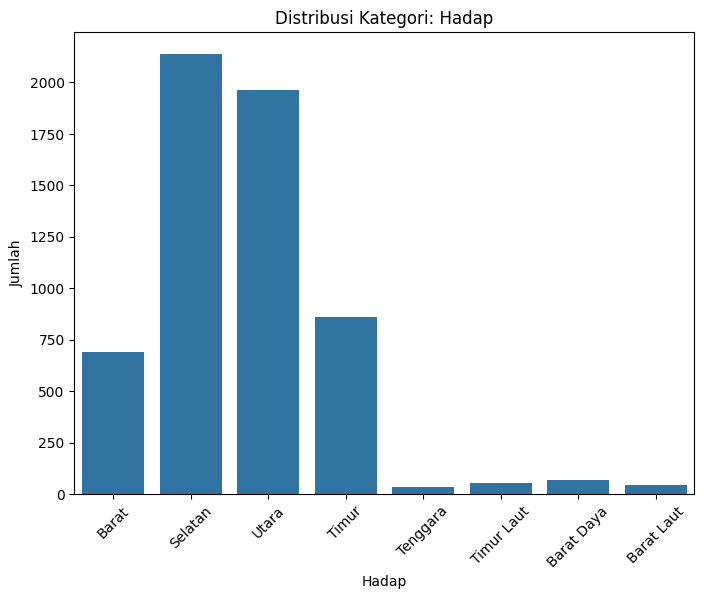

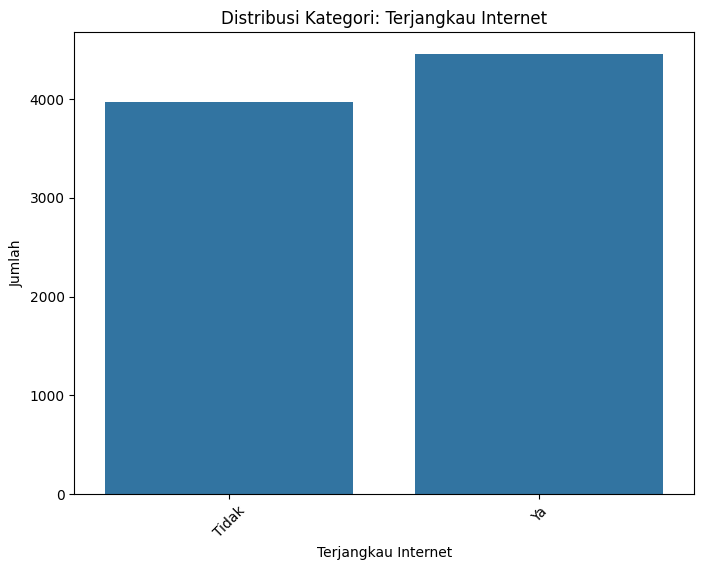

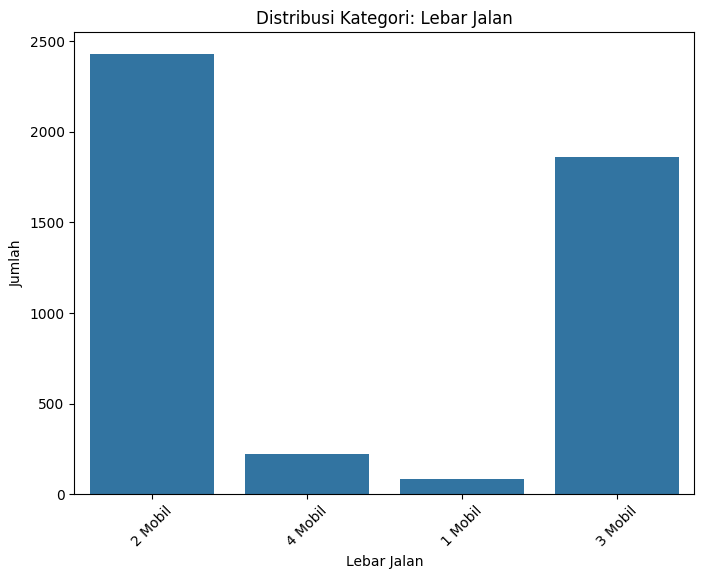

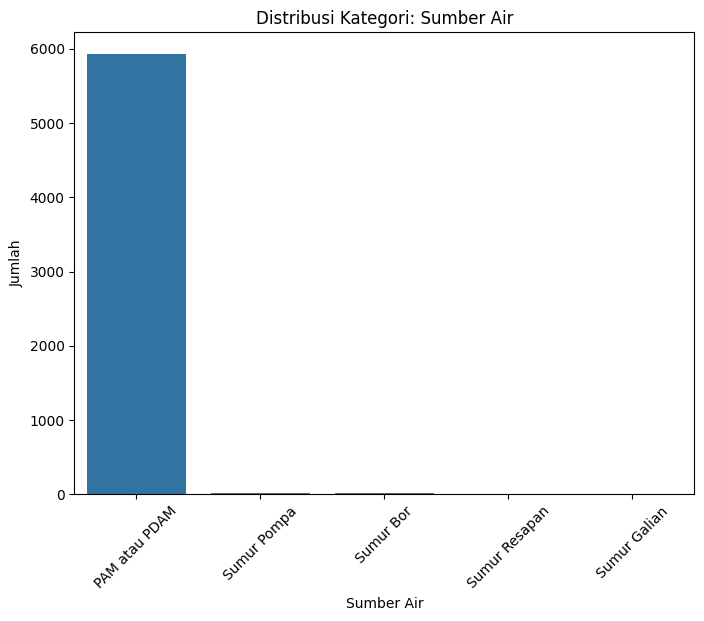

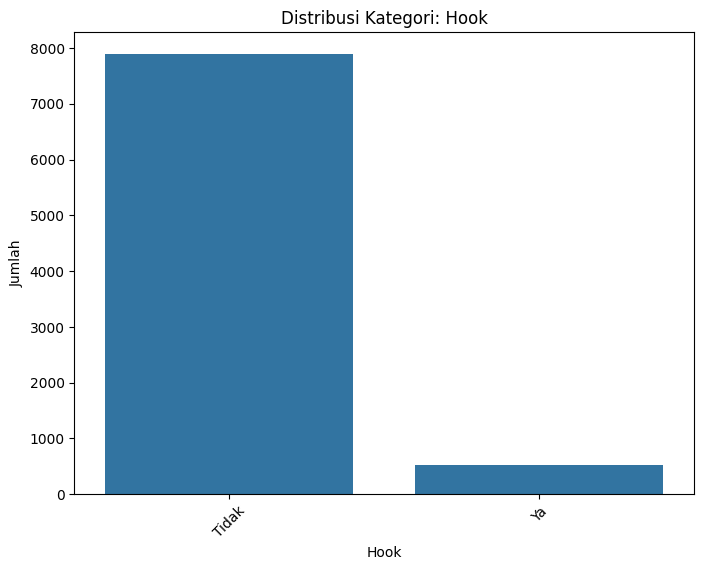

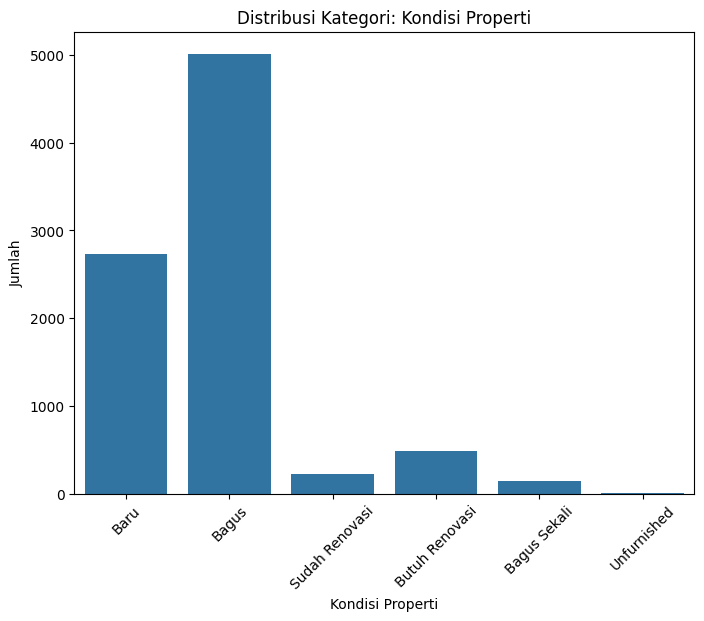

In [13]:
# 7. Distribusi fitur kategorikal
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=data)
    plt.title(f"Distribusi Kategori: {feature}")
    plt.xticks(rotation=45)
    plt.xlabel(feature)
    plt.ylabel("Jumlah")
    plt.show()


Jumlah Nilai Hilang Setiap Kolom:
Kecamatan                 0
 Price                    0
Kamar Tidur               0
Kamar Mandi               0
Luas Tanah                0
Luas Bangunan             0
Sertifikat                0
Daya Listrik           2165
Ruang Makan            2362
Ruang Tamu              566
Kondisi Perabotan         0
Jumlah Lantai            39
Hadap                  3129
Terjangkau Internet     564
Lebar Jalan            4387
Sumber Air             3019
Hook                    564
Kondisi Properti        380
dtype: int64


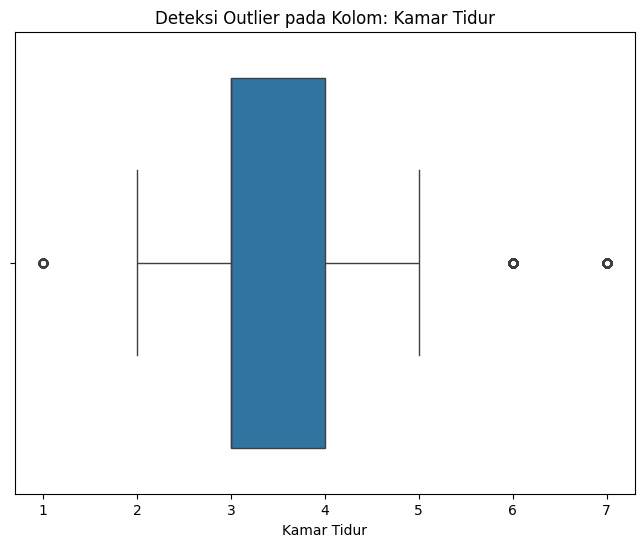

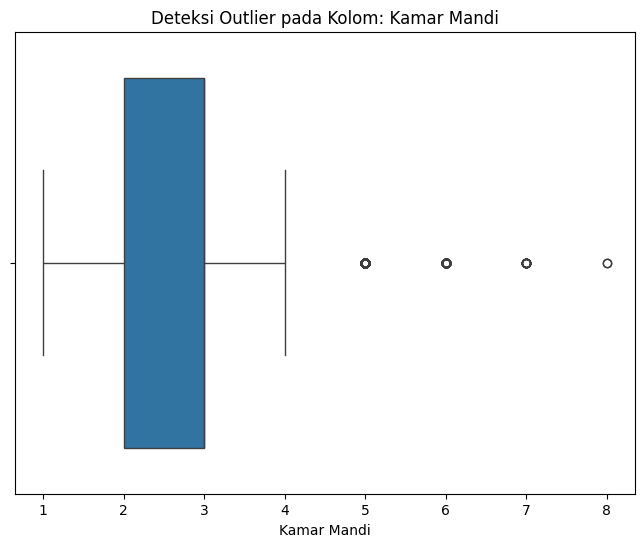

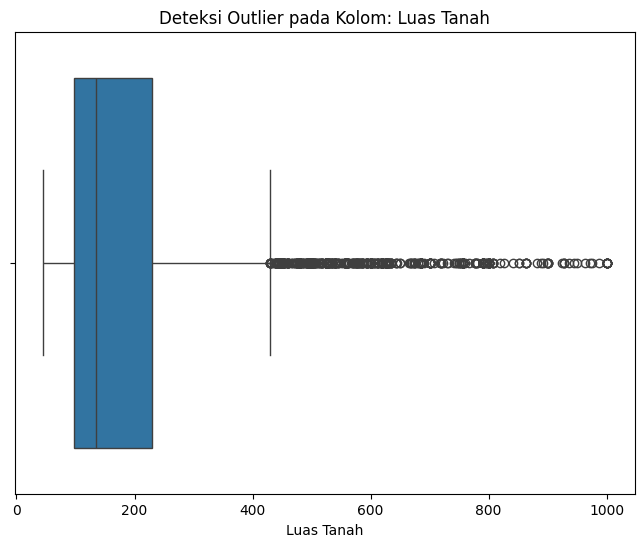

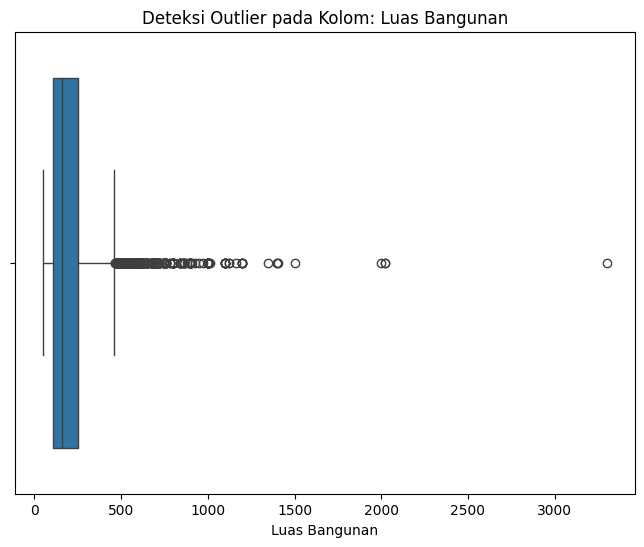

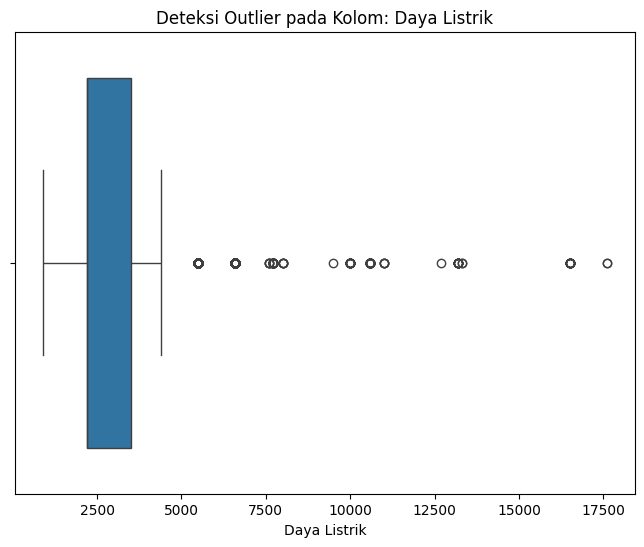

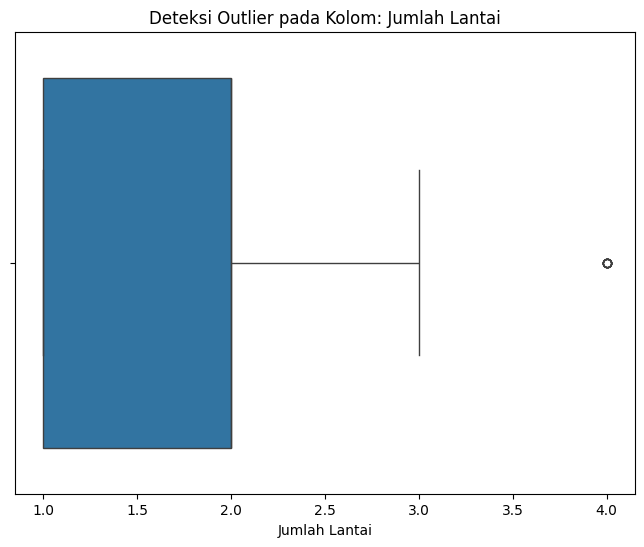

In [30]:
# 8. Nilai hilang
print("\nJumlah Nilai Hilang Setiap Kolom:")
print(data.isnull().sum())
# 9. Deteksi outlier dengan boxplot
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[feature])
    plt.title(f"Deteksi Outlier pada Kolom: {feature}")
    plt.xlabel(feature)
    plt.show()
    # 10. Distribusi Harga Rumah
if 'Price' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data['Price'], kde=True)
    plt.title('Distribusi Harga Rumah')
    plt.xlabel('Price')
    plt.ylabel('Frekuensi')
    plt.show()

    # 11. Hubungan Luas Bangunan vs Harga
if 'Luas Bangunan' in data.columns and 'Price' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Luas Bangunan', y='Price', data=data)
    plt.title('Hubungan Luas Bangunan vs Harga')
    plt.xlabel('Luas Bangunan')
    plt.ylabel('Price')
    plt.show()
    # 12. Hubungan Luas Tanah vs Harga
if 'Luas Tanah' in data.columns and 'Price' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Luas Tanah', y='Price', data=data)
    plt.title('Hubungan Luas Tanah vs Harga')
    plt.xlabel('Luas Tanah')
    plt.ylabel('Price')
    plt.show()
    # 13. Hubungan Jumlah Kamar Tidur dan Harga
if 'Kamar Tidur' in data.columns and 'Price' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Kamar_Tidur', y='Price', data=data)
    plt.title('Harga Berdasarkan Jumlah Kamar Tidur')
    plt.xlabel('Jumlah Kamar Tidur')
    plt.ylabel('Price')
    plt.show()

Tahap 3: Verifikasi Kualitas Data

In [32]:
import pandas as pd

# Load dataset
data = pd.read_csv('/content/sample_data/Data_Harga_rumah_surabaya.csv', delimiter=';')

print("Lima Baris Pertama Data:")
print(data.head())

print("\nInformasi Tipe Data:")
print(data.info())

print("\nStatistik Deskriptif:")
print(data.describe())

# 1. Validasi Umur Bangunan (jika ada)
if 'umur_bangunan' in data.columns:
    print("\nValidasi Umur Bangunan:")
    if data['umur_bangunan'].min() < 0:
        print("❌ Terdapat nilai umur bangunan negatif.")
    else:
        print("✅ Nilai umur bangunan valid.")

# 2. Validasi Harga Rumah
if 'harga' in data.columns:
    print("\nValidasi Harga Rumah:")
    max_harga = data['harga'].max()
    if max_harga > 10_000_000_000:  # contoh batas atas: 10 Miliar
        print(f"❌ Harga rumah terlalu tinggi. Maksimum saat ini: {max_harga:,}")
    else:
        print("✅ Harga rumah dalam rentang wajar.")

# 3. Validasi Luas Tanah
if 'luas_tanah' in data.columns:
    print("\nValidasi Luas Tanah:")
    if (data['luas_tanah'] <= 0).sum() > 0:
        print("❌ Ada nilai luas tanah nol atau negatif.")
    else:
        print("✅ Luas tanah valid.")

# 4. Validasi Luas Bangunan
if 'luas_bangunan' in data.columns:
    print("\nValidasi Luas Bangunan:")
    if (data['luas_bangunan'] <= 0).sum() > 0:
        print("❌ Ada nilai luas bangunan nol atau negatif.")
    else:
        print("✅ Luas bangunan valid.")

# 5. Validasi Jumlah Kamar Tidur
if 'kamar_tidur' in data.columns:
    print("\nValidasi Jumlah Kamar Tidur:")
    if data['kamar_tidur'].max() > 20:
        print("❌ Jumlah kamar tidur sangat tinggi, periksa kembali.")
    else:
        print("✅ Jumlah kamar tidur dalam rentang wajar.")

# 6. Validasi Kategori: Jenis Sertifikat (jika ada)
if 'jenis_sertifikat' in data.columns:
    print("\nValidasi Jenis Sertifikat:")
    valid_sertifikat = ['SHM', 'HGB', 'AJB', 'Lainnya']
    invalid = data[~data['jenis_sertifikat'].isin(valid_sertifikat)]
    if not invalid.empty:
        print(f"❌ Ditemukan {len(invalid)} nilai sertifikat tidak valid.")
        print("Nilai tidak valid:\n", invalid['jenis_sertifikat'].unique())
    else:
        print("✅ Semua nilai jenis sertifikat valid.")

# 7. Deteksi dan Tangani Duplikat
print("\nValidasi Duplikat:")
duplicates = data.duplicated().sum()
if duplicates > 0:
    print(f"❌ Ditemukan {duplicates} baris duplikat.")
    # Jika ingin menghapus: data = data.drop_duplicates()
else:
    print("✅ Tidak ada baris duplikat.")

# 8. Validasi Nilai Negatif Tidak Wajar
print("\nValidasi Nilai Negatif pada Kolom Numerik:")
for col in data.select_dtypes(include=['number']).columns:
    count_neg = (data[col] < 0).sum()
    if count_neg > 0:
        print(f"❌ Kolom '{col}' mengandung {count_neg} nilai negatif.")
    else:
        print(f"✅ Kolom '{col}' tidak memiliki nilai negatif.")

# 9. Validasi Nilai Hilang
print("\nValidasi Missing Values:")
missing = data.isnull().sum()
if missing.sum() > 0:
    print("❌ Terdapat missing values pada kolom berikut:")
    print(missing[missing > 0])
else:
    print("✅ Tidak ada missing values.")


Lima Baris Pertama Data:
   Kecamatan         Price   Kamar Tidur  Kamar Mandi  Luas Tanah  \
0  wonokromo   600.000.000             3            2          45   
1    rungkut   600.000.000             3            2          48   
2   semampir   600.000.000             3            3          48   
3      pakal   600.000.000             2            1          50   
4   gayungan   600.000.000             2            2          51   

   Luas Bangunan                  Sertifikat  Daya Listrik Ruang Makan  \
0             70  SHM - Sertifikat Hak Milik        1300.0       Tidak   
1           2023  SHM - Sertifikat Hak Milik        1300.0          Ya   
2             85  SHM - Sertifikat Hak Milik        1300.0          Ya   
3             91     HGB - Hak Guna Bangunan        1300.0          Ya   
4             50  SHM - Sertifikat Hak Milik        2200.0       Tidak   

  Ruang Tamu Kondisi Perabotan  Jumlah Lantai    Hadap Terjangkau Internet  \
0      Tidak       Unfurnished       